# Assignment Week 16
## Group 3


1. According to the central limit theorem the sum of $N$ random variables $x_{k}$ with means $E_k$ and variances $\sigma_{k}^{2}$ will have a normal distribution with mean $\sum_{k=1}^{N}E_{k}$; and variance $\sigma^{2}=\sum_{k=1}^{N}\sigma_{k}^{2}$, if $N$ is large (theoretically infinite).    
  A uniform variate between -1 and +1 has a variance of 1/3 so that sums of 27 such deviates should have a normal distribution with mean zero and standard deviation $\sigma=3$.   
  Using a uniform random number generator find 100 000 such sums and find the proportions within $\sigma$, 2$\sigma$ and 3$\sigma$ from the mean. For a normal distribution these should be 0.6826, 0.9545 and 0.9973.

The standard deviation of the sum is 2.993179490517728.

The proportions within sigma, 2sigma and 3sigma from the mean 
is 0.67908, 0.95535, 0.99788.

Very close to the gauss function with the same mean and std.


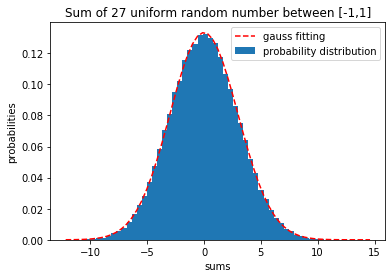

In [3]:
# HJH
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

sums = []
for i in range(100000):
    randlist = rd.rand(1,27)
    randlist = (randlist - 0.5) * 2  # 调整范围
    sums.append(randlist.sum())

num_bins = 60 #直方图柱子的数量
n, bins, patches = plt.hist(sums, num_bins, density=1)
plt.title('Sum of 27 uniform random number between [-1,1]')
plt.xlabel('sums')
plt.ylabel('probabilities')

sums = np.array(sums)
stds = np.std(sums)
means = np.mean(sums)
# 用高斯函数拟合
y = norm.pdf(bins, means, stds)
plt.plot(bins, y, 'r--')
plt.legend(['gauss fitting','probability distribution'])
print('The standard deviation of the sum is {}.\n'.format(stds))

def findnum(x,ranges):
    y = x[x <= ranges]
    y = y[y >= -ranges]
    return len(y)/len(x)

print('The proportions within sigma, 2sigma and 3sigma from the mean \n\
is {}, {}, {}.\n'.format(findnum(sums,stds),findnum(sums,2*stds),findnum(sums,3*stds)))

print('Very close to the gauss function with the same mean and std.')

2. Apply the inverse transformation method to generate a series of random variables $x$ with a distribution function $p(x) = \dfrac{1}{ 2} \sin\pi x$ in the range $0 \leq x \leq 1$. 
   Plot the historgram and compare your result with the theoretical value.

by zhangxi  
I think $p(x)$ should be $p(x) = \frac{\pi}{2}\sin{\pi x}$.Then $\int_{0}^1 p(x)dx =1$
$$
\begin{aligned}P(y) &= \int_{0}^{y}\frac{\pi}{2}\sin\pi xdx\\
&=\frac{1}{2} (1-\cos(\pi x))
\end{aligned}
$$
Then $$P^{-1}(x) = \arccos(1-2y)$$

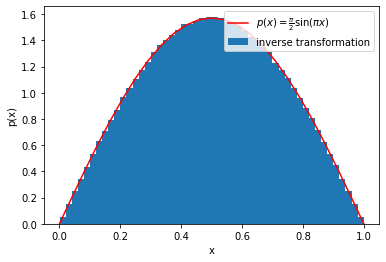

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.rand(1000000)
y = np.arccos(1-2*x)/np.pi
t = np.linspace(0,1,25)

plt.hist(y,50,label = 'inverse transformation',density = True)
plt.plot(t,np.pi/2*np.sin(np.pi*t),'r',label = r'$p(x)=\frac{\pi}{2}\sin{(\pi x)}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()


3. Investigate the behavior of a random walk in which the probabilities for different step directions are not equal. For example, consider a one-dimensional walk with $p_{\text{left}}=0.25$ and $p_{\text{right}}=0.75$. In what sense is the motion still diffusive?

The standard deviation of the sum is 8.63616968568821.

As we can see, still fit well with gauss function, which is the distribution of diffusion.


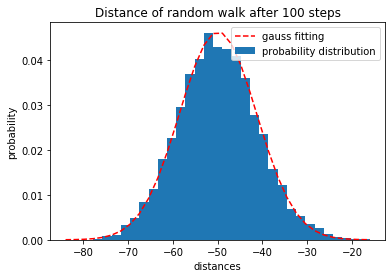

In [2]:
# HJH
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

def randomwalk(N=100):
    dis = 0
    for i in range(N):
        x = rd.rand()
        if x > 0.75:
            dis += 1
        else:
            dis -= 1
    return dis

distance = []
for j in range(10000):
    distance.append(randomwalk())

num_bins = 33 #直方图柱子的数量
n, bins, patches = plt.hist(distance, num_bins, density=1)
plt.title('Distance of random walk after 100 steps')
plt.xlabel('distances')
plt.ylabel('probability')

distance = np.array(distance)
stds = np.std(distance)
means = np.mean(distance)
# 用高斯函数拟合oba
y = norm.pdf(bins, means, stds)
plt.plot(bins, y, 'r--')
plt.legend(['gauss fitting','probability distribution'])
print('The standard deviation of the sum is {}.\n'.format(stds))
print('As we can see, still fit well with gauss function, which is the distribution of diffusion.')

4. Write a program to simulate a 2-D random walk.

(1) To increase the amount of randomness, independently choose random values for $\Delta x^{\prime}$ and $\Delta y^{\prime}$ in the range $\left[
-1,1\right]$. Then normalize them so that each step is of unit length
$$
    \Delta x=\frac{1}{L}\Delta x^{\prime},\text{ }\Delta y=\frac{1}{L}\Delta
y^{\prime},\text{ }L=\sqrt{\Delta x^{\prime2}+\Delta y^{\prime2}}%
$$
(2) Using a plotting program to draw maps of several independent random walks, each of 1000 steps. Comment on whether these look like what you would expect of a random walk.



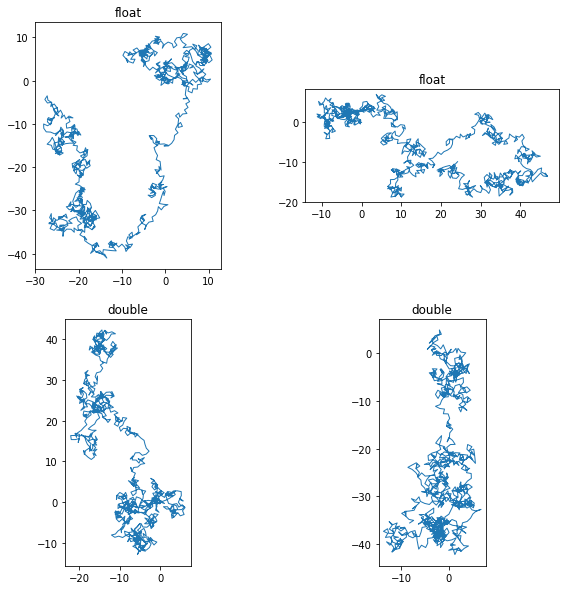

In [10]:
# done by 陈丹扬 
# (1) & (2)
import numpy as np 
import time
import matplotlib.pyplot as plt

def RandomWalk2D(N, dtype=np.float32):
    np.random.seed(int(time.time() * 1000 % 2**32))
    steps = np.random.rand(N, 2) - 0.5
    steps = steps / np.reshape(np.sqrt(np.sum(steps**2, axis=1, dtype=dtype)), (N, 1))

    pos = np.zeros((N+1, 2))
    for i in range(N):
        pos[i+1, :] = pos[i] + steps[i]
    
    return pos

def plotWalk2D(pos, linewidth=1, title=None):
    plt.plot(pos[:, 0], pos[:, 1], linewidth=linewidth)
    plt.axis('scaled')
    plt.title(title)

plt.figure(figsize=(10, 10))
plt.subplot(221)
plotWalk2D(RandomWalk2D(1000, dtype=np.float32), title="float")
plt.subplot(222)
plotWalk2D(RandomWalk2D(1000, dtype=np.float32), title="float")
plt.subplot(223)
plotWalk2D(RandomWalk2D(1000, dtype=np.float64), title="double")
plt.subplot(224)
plotWalk2D(RandomWalk2D(1000, dtype=np.float64), title="double")
plt.show()
plt.close()

Comment: These graphs satisfy my expectation of random walk, which describe a walker moves irregularly on the 2D surface, and as time goes, they tend to move apart from the original point (0, 0).

(3) If you have your walker taking $N$ steps in a single trial, then conduct a total number $K\simeq\sqrt{N}$ trials. Each trial should have $N$ steps and start with a different seed.
Calculate the mean square distance $R^{2}$ for each trial and then take the average of $R^{2}$ for all your $K$ trials: 
$$
\left\langle R^{2}\left(  N\right)  \right\rangle =\frac{1}{K}\sum_{k=1}%
^{K}R_{\left(  k\right)  }^{2}\left(  N\right)
$$
(4) Plot the root-mean-square distance $R_{\text{rms}}=\left\langle R^{2}\left(  N\right)\right\rangle$ as a function of $\sqrt{N}$. Values of $N$ should start with a small number, where $R\simeq\sqrt{N}$ is not expected to be accurate, and end at a quite large value, where two or three places of accuracy should be expected on the average.
(5) Check to see if you obtained the expected statistical "error band" of $\pm\sqrt{R}\simeq N^{1/4}$ for large values of $N$.

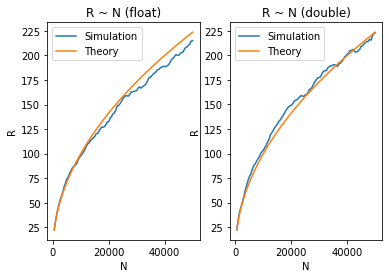

In [11]:
# (3), (4) & (5)
# to save time, I make use of all positions in N steps

def VarianceSimulator2D(N_start, N_end, N_step, dtype=np.float32):
    exp_num = (N_end - N_start) // N_step + 1
    N_space = np.linspace(N_start, N_end, exp_num)

    K = int(N_end**(1/2))

    R = np.zeros(exp_num)
    for i in range(K):
        pos = RandomWalk2D(N_end, dtype=dtype)
        for j in range(exp_num):
            x = pos[int(N_space[j]), 0]
            y = pos[int(N_space[j]), 1]
            R[j] += x**2 + y**2     # do sum, then average

    R /= K
    return R**(1/2)


N_start = 500
N_step = 500
N_end = 50000
exp_num = (N_end - N_start) // N_step + 1
N_space = np.linspace(N_start, N_end, exp_num)

plt.figure()
plt.subplot(121)
R_float = VarianceSimulator2D(N_start, N_end, N_step, np.float32)
plt.title("R ~ N (float)")
plt.plot(N_space, R_float, label='Simulation')
plt.plot(N_space, N_space**(1/2), label='Theory')
plt.xlabel("N")
plt.ylabel("R")
plt.legend()

plt.subplot(122)
R_double = VarianceSimulator2D(N_start, N_end, N_step, np.float64)
plt.title("R ~ N (double)")
plt.plot(N_space, R_double, label='Simulation')
plt.plot(N_space, N_space**(1/2), label='Theory')
plt.xlabel("N")
plt.ylabel("R")
plt.legend()

plt.show()
plt.close()

(6) (Optional) Check the validity of the assumptions made in deriving the theoretical result by checking how well 
$$
\frac{\left\langle \Delta x_{i}\Delta x_{j\neq i}\right\rangle }{R^{2}}%
\simeq\frac{\left\langle \Delta x_{i}\Delta y_{j}\right\rangle }{R^{2}}\simeq0 
$$
Do your checking for both a single (long) run and for the average over trials.

In [5]:
def RandomWalk2D_steps(N, dtype=np.float32):
    np.random.seed(int(time.time() * 1000 % 2**32))
    steps = np.random.rand(N, 2) - 0.5
    steps = steps / np.reshape(np.sqrt(np.sum(steps**2, axis=1, dtype=dtype)), (N, 1))

    return steps
# delta_x * delta_x:
N = 5000
summation_float = 0
summation_double = 0
steps_float = RandomWalk2D_steps(N, dtype=np.float32)
steps_double = RandomWalk2D_steps(N, dtype=np.float64)
for i in range(N):
    for j in range(i+1, N):
        summation_float += steps_float[i, 0] * steps_float[j, 0]
        summation_double += steps_double[i, 0] * steps_double[j, 0]
summation_float /= (1 + N-1) * (N-1) / 2
summation_double /= (1 + N-1) * (N-1) / 2
print(f"float: <delta_x * delta_x> = {summation_float:.10f}")
print(f"double: <delta_x * delta_x> = {summation_double:.10f}")

# delta_x * delta_y:
summation2_float = np.mean(steps_float[:, 0] * steps_float[:, 1])
summation2_double = np.mean(steps_double[:, 0] * steps_double[:, 1])
print(f"float: <delta_x * delta_y> = {summation2_float:.10f}")
print(f"double: <delta_x * delta_y> = {summation2_double:.10f}")



float: <delta_x * delta_x> = -0.0000844743
double: <delta_x * delta_x> = 0.0000403574
float: <delta_x * delta_y> = -0.0053152964
double: <delta_x * delta_y> = -0.0082606624


Comment: These values above is close to 0 with 1e-2 accuracy, and with no dependency with data type when steps=5000.

5. Imagine a closed box that is divided into two parts of equal volume. The left half contains a gas of $N$ identical particles and the right half is initially empty. We then make a small hole in the partition between the two halves. We know that after some time, the average number of particles in each half of the box will become $N$, and we say that the system has reached equilibrium.

    ​	Let $n$ be the number of particles in the left part of the box. Because each particle has the same chance to go through the hole, the probability per unit time that a particle moves from left to right equals the number of particles on the left divided by the total number of particles. Write the program so that the following algorithm is implemented:

    -   Generate a random number $r$ from a uniformly distributed set of random numbers in the interval $0\leq r <1$.

    -   If $r\leq p=n/N$, move a particle from left to right, that is $n\rightarrow n-1$; otherwise, $n\rightarrow n+1$.

    (1) Does the time dependence of $n$ appear to be deterministic for sufficient large $N$? 

    Hint: $n(t)=\dfrac{N}{2}\left(1+e^{-2t/N}\right)$

    (2) How long does it take for the system to reach equilibrium? How does this time depend on the number of particles? Choose the total number of particles $N$ to be $N=8,16,64,400,800$, and $3600$.

    (3) A measure of the equilibrium fluctuations is the mean square fluctuation $\Delta n^2$, which is defined as 
    $$
    \begin{aligned}
          \Delta n^2=\langle (n-\langle n\rangle)^2\rangle=\langle n^2\rangle-\langle n\rangle^2
          \end{aligned} 
    $$
    The brackets $\langle \cdots\rangle$ denotes an average taken after the system has reached equilibrium. Modify your program so that averages are taken after equilibrium has been reached. Run for a time that is long enough to obtain meaningful results. How does the relative fluctuations, $\Delta n/\langle n\rangle$, depend on $N$?

By 陈丹扬  
(1) Yes, since if N is very large, we can regard the process as in each time interval $dt$, $(2n/N-1)dt$ particles goes from left to right. (if $n>N/2$) By solving the diffrencial equation $dn = -(2n/N-1)dt$ with initial condition, we will get final solution $n(t)=\frac{N}{2}(1+e^{-2t/N})$ 

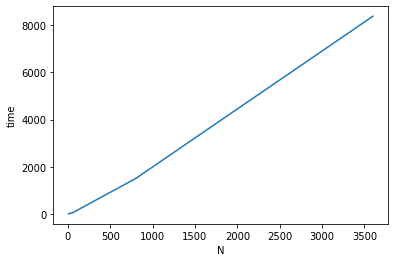

In [3]:
# (2)
import numpy as np
import matplotlib.pyplot as plt
import time

def EquSimulator(N, t_max=50000, init_n=None):
    np.random.seed(int(time.time() * 1000 % 2**32))
    if init_n == None:
        init_n = N
    t = 0
    n = init_n
    while(t <= t_max):
        if np.random.rand() > n/N:
            n += 1
        else:
            n -= 1
        t += 1
        if n == N//2:
            return t
    return -1 # fail to reach equilibrium


N_list = [8, 16, 64, 400, 800, 3600]
ave_num = 100
time_list = []
for N in N_list:
    mean_time = 0
    for _ in range(ave_num):
        t = EquSimulator(N)
        if t < 0:
            print("Fail to reach equilirium at N =", N)
            exit(-1)
        mean_time += t
    mean_time /= ave_num
    time_list.append(mean_time)

plt.figure()
plt.plot(N_list, time_list)
plt.xlabel("N")
plt.ylabel("time")
plt.show()


Comment: Graph shows a linear relationship between time and N.  

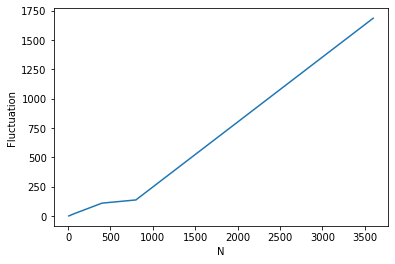

In [4]:
# (3)
def FlucSimulator(N, t_max, init_n=None):
    np.random.seed(int(time.time() * 1000 % 2**32))
    if init_n == None:
        init_n = N // 2

    n = init_n
    fluct = 0
    for t in range(t_max):
        if np.random.rand() > n/N:
            n += 1
        else:
            n -= 1
        fluct += (n - N/2)**2
    
    return fluct / t_max

fluctuation = []
for N in N_list:
    fluctuation.append(FlucSimulator(N, 10000))

plt.figure()
plt.plot(N_list, fluctuation)
plt.xlabel("N")
plt.ylabel("Fluctuation")
plt.show()


Comment: The graph showed a linear relationship between $\Delta n$ and $N$, which means $\Delta n ~ N^{1/2}$

6. One way to calculate $\pi$ is by randomly throwing a dart into the unit square defined by $x \in [0, 1]$ and $y\in [0, 1]$ in the $xy$ plane. The chance of the dart landing inside the unit circle centered at the origin of the coordinates is $\pi/4$, from the comparison of the areas of one quarter of the circle and the unit square. Write a program to calculate $\pi$ in such a manner.
   In your program, repeat this experiment many times (meaning many 5000-sample trials, say 1000 such trials) and use your results to estimate the statistical uncertainty (standard deviation of the mean result) in your calculation.

In [15]:
#by zhangxi
import numpy as np

x = np.random.rand(1000,5000)   #1000代表实验组数，5000代表每组内投点次数
y = np.random.rand(1000,5000)

distance = x**2+y**2
count = np.sum(distance<1,1)

pi = count/5000*4
print(f'E(pi) = {np.mean(pi)}')
print(f'std(pi) = {np.std(pi)}')

E(pi) = 3.1412472000000005
std(pi) = 0.023350826822047917


In [16]:
np.pi - np.mean(pi)

0.0003454535897926547

平均值的误差在一个标准差内